#hypothesis

1. the item's id shouldn't affect sales as it's mostly just a random number

2. the item weight can indeed increase sales as people tend to buy things that are heavier as they are getting more for their money ex: most people tend to buy a lire of milk instead of the hlaf litre

3. the fat content may show a slight correlation with higher sales because we generally tend to like more fatty foods that's just how we developed ( citation: https://pubmed.ncbi.nlm.nih.gov/9216570/#:~:text=Fats%20are%20responsible%20for%20the,also%20are%20high%20in%20energy.)

4. the item visibility should show more correlation with sales because we tend to by from brands we trust and know instead of an off-brand item

5. item type may or may not affect sales as generally people tend to buy more of things used daily but it maybe rendered as ineffective because most of the data are items that are used daily

6. an item's MRP may cause a great correlation with sales but we will have to test that

7. outlet id refers to the store itself so some stores are placed in areas where more customers will go so it will definitely affect sales

8. the establishment year my affect sales because older establishments will tend to sell more as regular goers will be more

9. bigger store my sell more but we will have to test that theory

10. location should affect sales because more crowded areas will have more customers

11. outlet type will probably affect sales as a grocery store will service less people than a supermarket


In [661]:
#some identefiers that we will probably use!
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.svm import SVC
svc = SVC(kernel='linear')
from sklearn.svm import LinearSVC, SVC
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
np.random.seed(42)

In [662]:
test_data_path="/content/drive/MyDrive/Data/Test.csv"
train_data_path="/content/drive/MyDrive/Data/Train.csv"

In [663]:
test_data=pd.read_csv(test_data_path)
train_data=pd.read_csv(train_data_path)

In [664]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [665]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [666]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [667]:
train_data.loc[train_data.Item_Type =='Dairy'].Item_Weight.isnull().sum()

116

we have alot of missing values in weight and outlet size we need to treat that

In [668]:
train_data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [669]:
from matplotlib.patches import make_wedged_bezier2
#we will fill in weight with mean weight
mwd = train_data.loc[train_data.Item_Type =='Dairy'].Item_Weight.mean()
mwsd = train_data.loc[train_data.Item_Type =='Soft Drinks'].Item_Weight.mean()
mwm = train_data.loc[train_data.Item_Type =='Meat'].Item_Weight.mean()
mwfv = train_data.loc[train_data.Item_Type =='Fruits and Vegetables'].Item_Weight.mean()
mwhh = train_data.loc[train_data.Item_Type =='Household'].Item_Weight.mean()
mwba = train_data.loc[train_data.Item_Type =='Baking Goods'].Item_Weight.mean()
mws = train_data.loc[train_data.Item_Type =='Snack Foods'].Item_Weight.mean()
mwff = train_data.loc[train_data.Item_Type == 'Frozen Foods'].Item_Weight.mean()
mwbk = train_data.loc[train_data.Item_Type == 'Breakfast'].Item_Weight.mean()
mwhe = train_data.loc[train_data.Item_Type =='Health and Hygiene'].Item_Weight.mean()
mwhd = train_data.loc[train_data.Item_Type =='Hard Drinks'].Item_Weight.mean()
mwc = train_data.loc[train_data.Item_Type =='Canned'].Item_Weight.mean()
mwbr = train_data.loc[train_data.Item_Type == 'Breads'].Item_Weight.mean()
mwsf = train_data.loc[train_data.Item_Type =='Starchy Foods'].Item_Weight.mean()
mwo = train_data.loc[train_data.Item_Type == 'Others'].Item_Weight.mean()
mwsea = train_data.loc[train_data.Item_Type =='Seafood'].Item_Weight.mean()
print(mwsd,mwm,mwc,mwfv,mwhh,mwba,mws,mwff,mwbk,mwhe,mwhd,mwbr,mwsf,mwo,mwsea)


11.847459893048129 12.81734421364985 12.305705009276437 13.224769381746812 13.384736495388669 12.277108208955223 12.987879554655873 12.867061281337046 12.768202247191004 13.14231395348837 11.400327868852457 11.346936274509803 13.69073076923077 13.853284671532847 12.5528431372549


In [670]:
# Upon inspecting the mean weights of all items seem to be similar
# Since no item is way too heavier or way too lighter
# Filling all nulls with mean values
train_data.Item_Weight.fillna(train_data.Item_Weight.median(),inplace=True)
train_data.Item_Weight.isnull().sum()

0

In [671]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<Axes: xlabel='Count', ylabel='Outlet_Size'>

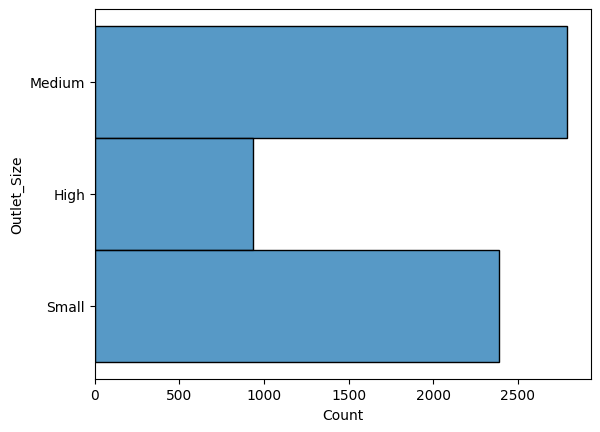

In [672]:
sns.histplot(y=train_data["Outlet_Size"])

In [673]:
def implacing (row):
    if row.Outlet_Identifier == 'OUT010' : return 'Small'
    elif row.Outlet_Identifier == 'OUT017' : return 'Medium'
    elif row.Outlet_Identifier == 'OUT045' : return 'Medium'
    else : return row.Outlet_Size
train_data.Outlet_Size = train_data.apply(implacing,axis='columns')


In [674]:
#train_data['Item_Weight'].replace(to_replace = np.nan, value =data.Item_Weight.median(), inplace=True)
#train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(method='bfill', axis=0).fillna('Medium')

<Axes: xlabel='Count', ylabel='Outlet_Size'>

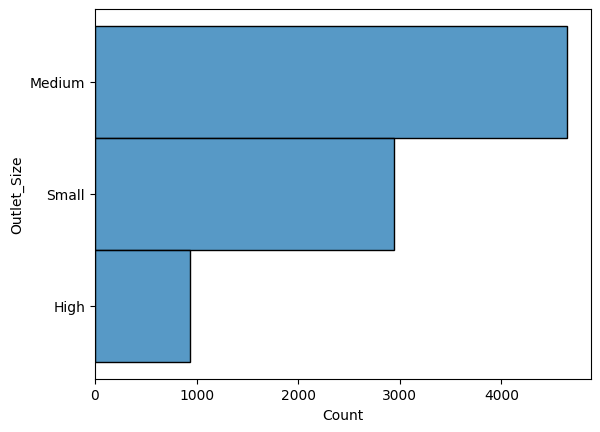

In [675]:
sns.histplot(y=train_data["Outlet_Size"])

In [676]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [677]:
duplicate = train_data.duplicated()
duplicate.sum()

0

<Axes: >

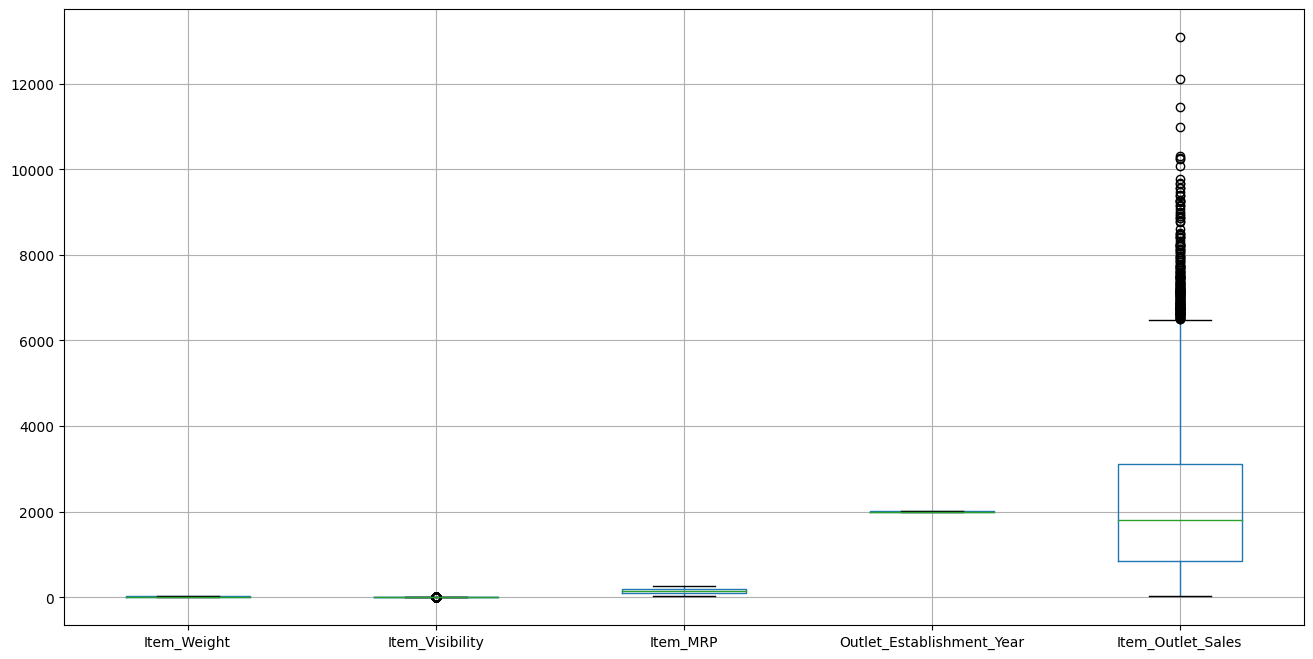

In [678]:
plt.figure(figsize=(16,8))
train_data.boxplot()

There are some outliers in item visibility and item outlet sales let's deal with those

In [679]:
def l_and_u (column):
  sorted(column)
  Q1,Q3=column.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return upper_range,lower_range


<Axes: >

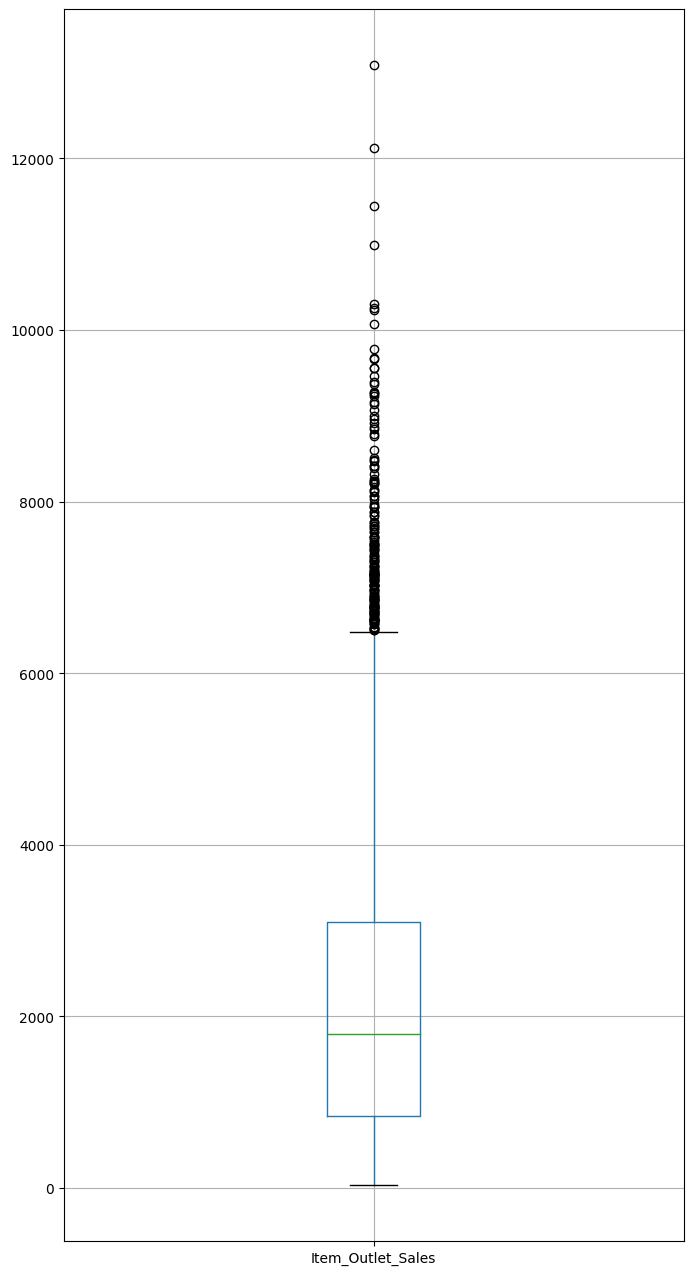

In [680]:
plt.figure(figsize=(8,16))
train_data.boxplot(column='Item_Outlet_Sales')

In [681]:
high_IOS,low_IOS = l_and_u(train_data.Item_Outlet_Sales)
train_data.Item_Outlet_Sales=np.where(train_data.Item_Outlet_Sales>high_IOS,high_IOS,train_data.Item_Outlet_Sales)
train_data.Item_Outlet_Sales=np.where(train_data.Item_Outlet_Sales<low_IOS,low_IOS,train_data.Item_Outlet_Sales)

<Axes: >

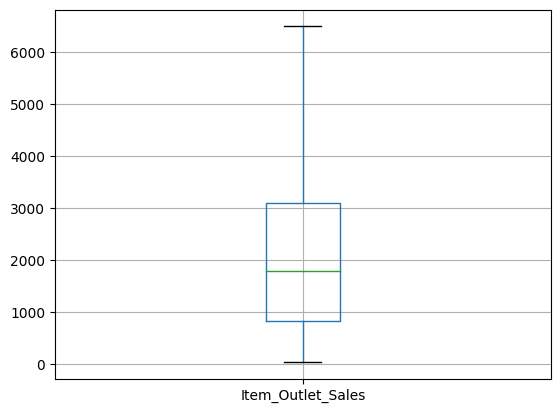

In [682]:
train_data.boxplot(column='Item_Outlet_Sales')

<Axes: >

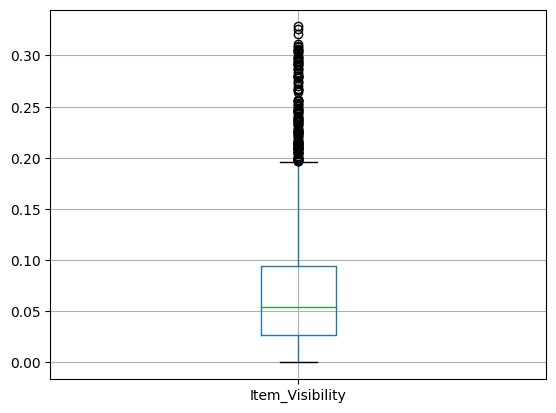

In [683]:
train_data.boxplot(column='Item_Visibility')

<Axes: >

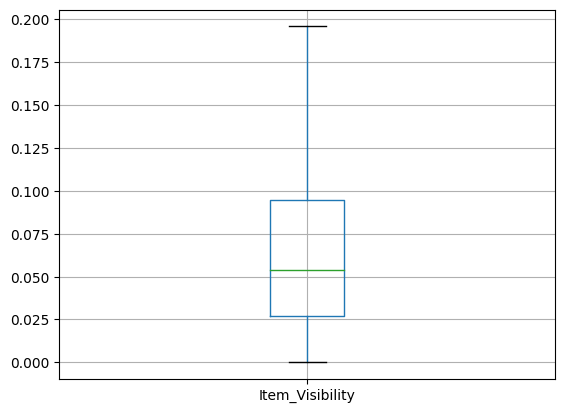

In [684]:
high_V,low_V = l_and_u(train_data.Item_Visibility)
train_data.Item_Visibility=np.where(train_data.Item_Visibility>high_V,high_V,train_data.Item_Visibility)
train_data.Item_Visibility=np.where(train_data.Item_Visibility<low_V,low_V,train_data.Item_Visibility)
train_data.boxplot(column='Item_Visibility')

# Univariate data analysis
here we should use some plots to check for corellation between our columns

In [685]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: xlabel='Count', ylabel='Outlet_Identifier'>

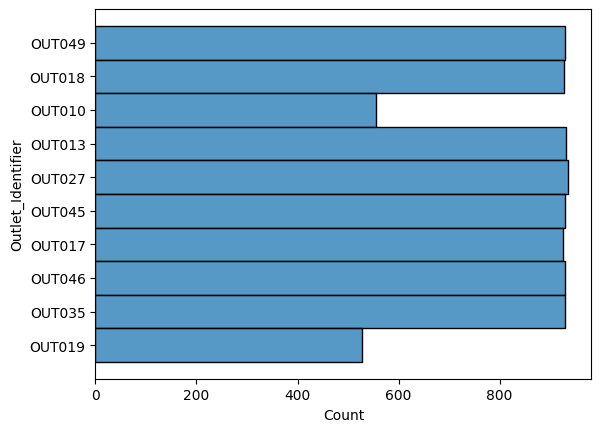

In [686]:
sns.histplot(y=train_data['Outlet_Identifier'])


<Axes: title={'center': 'Sales for each store'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

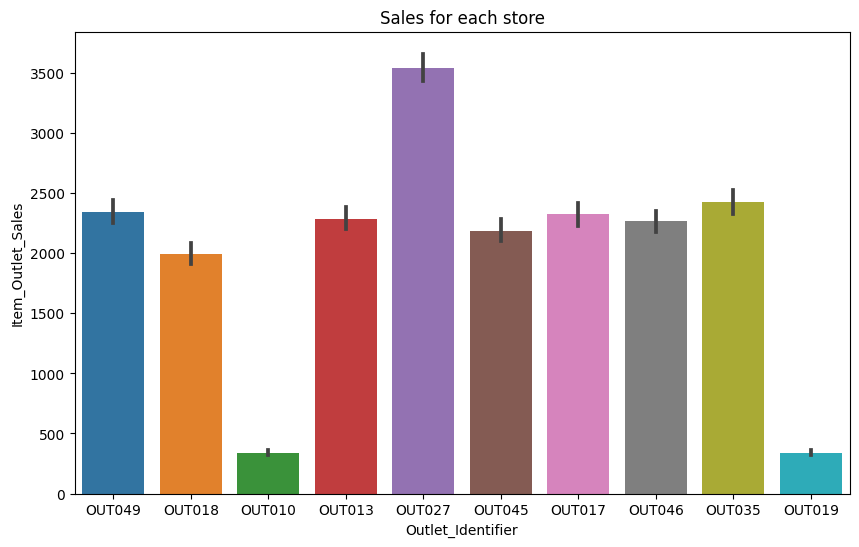

In [687]:
#since we have 10 outlets we want to know how do they affect sales
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Sales for each store")

sns.barplot(x=train_data.Outlet_Identifier, y=train_data.Item_Outlet_Sales)

here outlet 10 and 19 are doing way worse in sales than other outlets while outlet 27 is doing exceptionally well

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

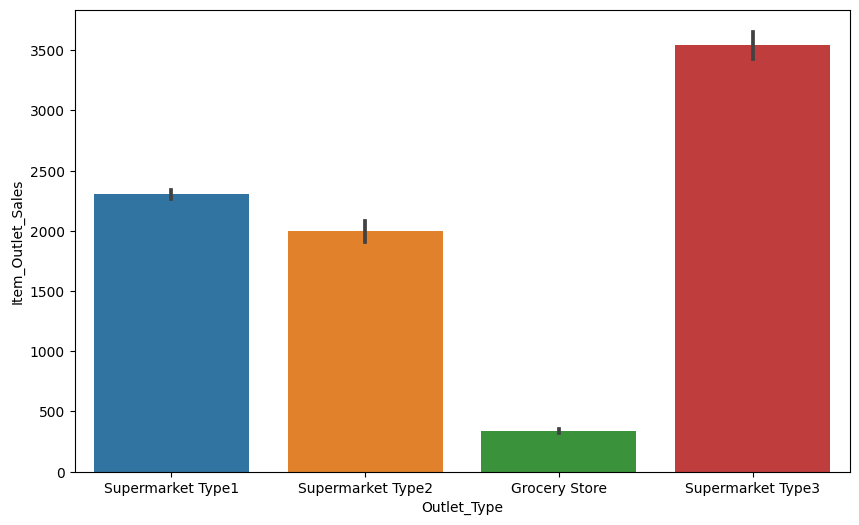

In [688]:
plt.figure(figsize=(10,6))
sns.barplot(x=train_data.Outlet_Type, y=train_data.Item_Outlet_Sales)

grocery stores(010,019) are doing very bad compared to supermarkets, while supermarket type3(027) is doing the best, supermarkets type1(013,017,035,045,046,049) are doing the second best while supermarket type 2 (018) is third best but marginally better than grocery stores

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

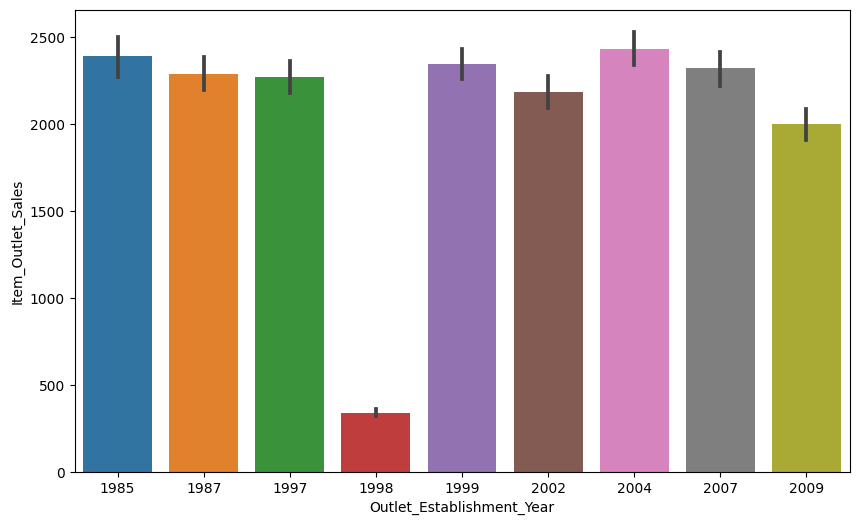

In [689]:
plt.figure(figsize=(10,6))
sns.barplot(x=train_data.Outlet_Establishment_Year, y=train_data.Item_Outlet_Sales)

In [690]:
train_data.Outlet_Establishment_Year.unique() #049 1999 017 2007 010 1998 027 1985 046 1997 018 2009 019 1985 045 2002 035 2004 013 1987

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

Every store is made in a certain year except for 027 and 019 are mad in the same year and 027 is the store that brings in the most sales while 019 brings in the lowest sales there seems to be no correlation between the year and the sales and it's just about the store

In [691]:
train_data.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

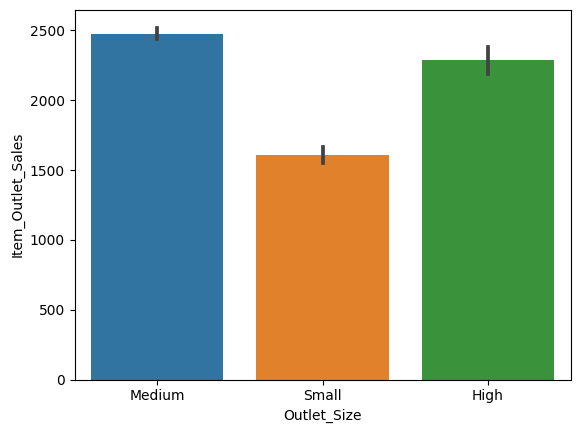

In [692]:
sns.barplot(x=train_data.Outlet_Size, y=train_data.Item_Outlet_Sales)

medium sized stores seem to sell the best

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

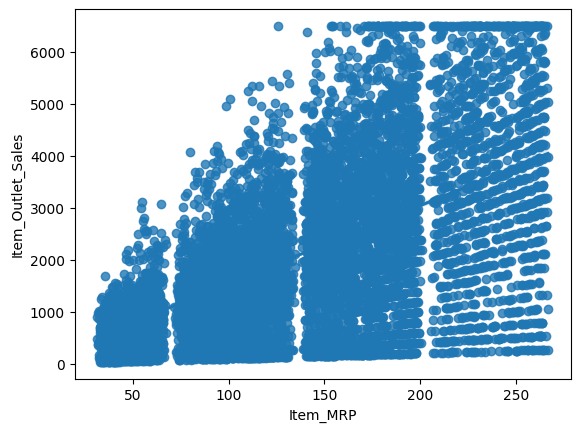

In [693]:
sns.regplot(x=train_data['Item_MRP'], y=train_data['Item_Outlet_Sales'])

the mrp does seem to have a good correlation with sales higher mrp seems to bring more sales

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

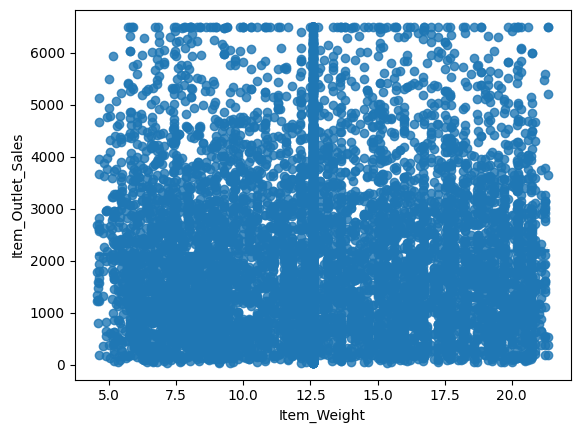

In [694]:
sns.regplot(x=train_data['Item_Weight'], y=train_data['Item_Outlet_Sales'])

weight doesn't seem to a have a big correlation with sales

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

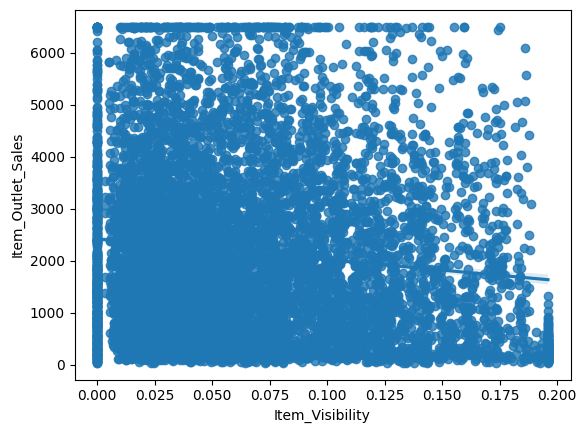

In [695]:
sns.regplot(x=train_data['Item_Visibility'], y=train_data['Item_Outlet_Sales'])

In [696]:
train_data.Item_Visibility.replace(to_replace=0,value=train_data.Item_Visibility.mean(),inplace=True)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

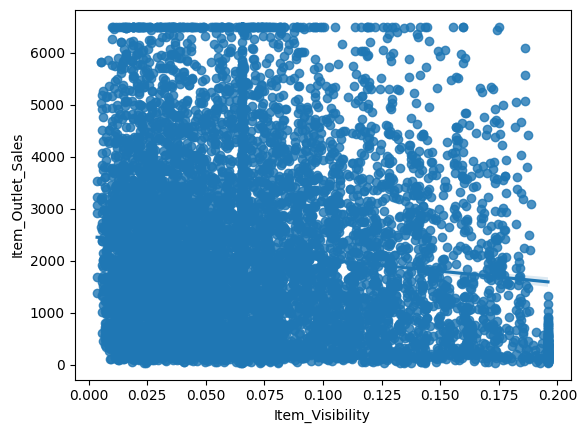

In [697]:
sns.regplot(x=train_data['Item_Visibility'], y=train_data['Item_Outlet_Sales'])

<ipython-input-698-fd10fcf22c7e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),vmin=-1,vmax=1,annot=True)


<Axes: >

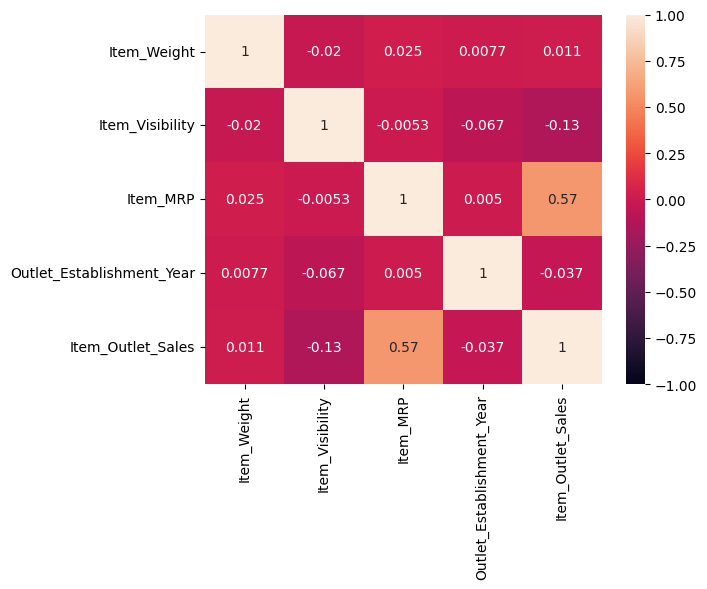

In [698]:
sns.heatmap(train_data.corr(),vmin=-1,vmax=1,annot=True)

visibility wierdly does seem to be inversley related to sales

In [699]:
train_data ['Outlet_Establishment_Year'] = pd.to_datetime(train_data ['Outlet_Establishment_Year'], format="%Y")

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

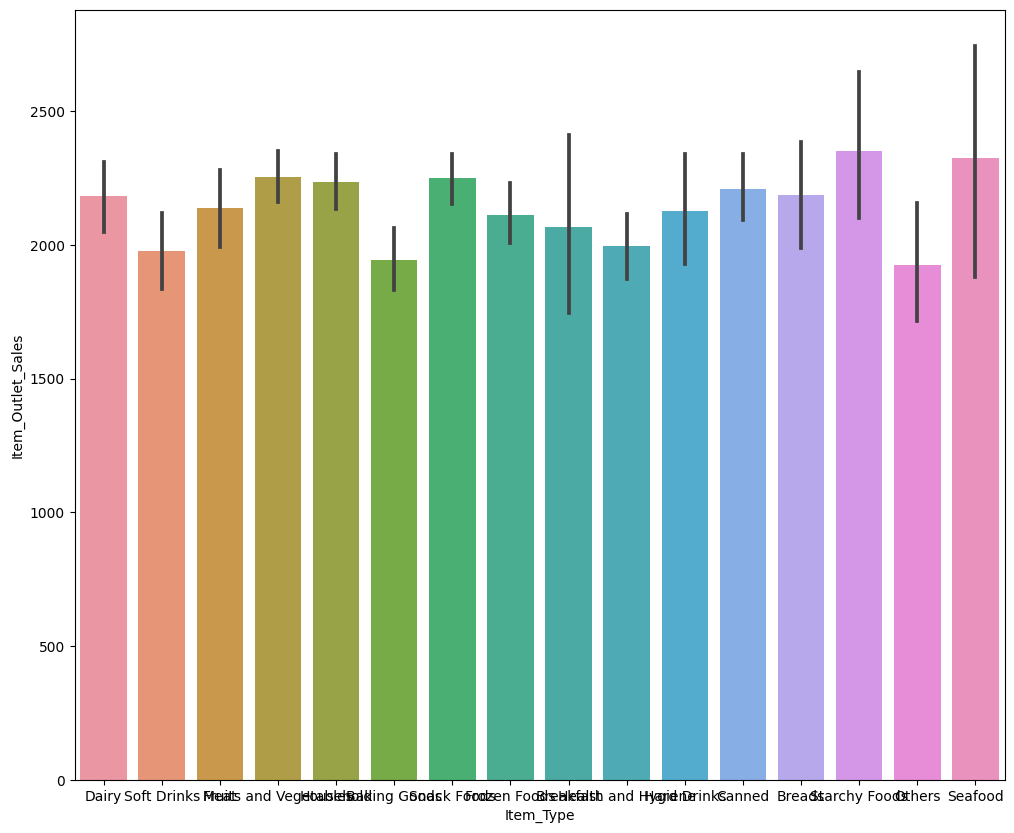

In [700]:
plt.figure(figsize=(12,10))
sns.barplot(x=train_data.Item_Type, y=train_data.Item_Outlet_Sales)

there's no clear distinction that the type brings in more sales

# Handling inconsistent Data intry

In [701]:
train_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

item fat have some anomalies where low fat , lf and Low fat are the same thing and Regular and reg are the same thing

In [702]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].str.lower()
train_data.loc[train_data['Item_Fat_Content']=='lf', 'Item_Fat_Content'] = 'low fat'
train_data.loc[train_data['Item_Fat_Content']=='reg', 'Item_Fat_Content'] = 'regular'

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

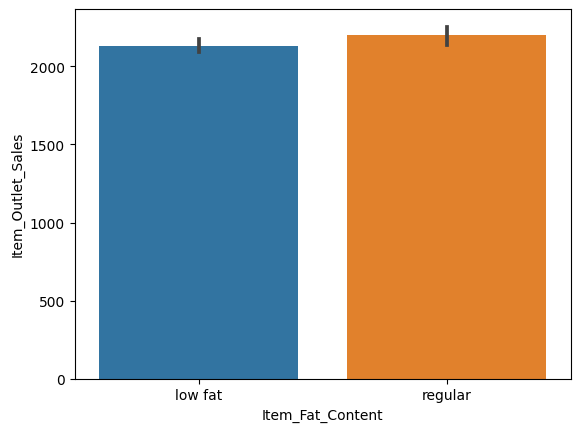

In [703]:
sns.barplot(x=train_data.Item_Fat_Content, y=train_data.Item_Outlet_Sales)

splitting columns in categorical and numerical

In [704]:
numerical=['Item_Weight','Item_Visibility','Item_MRP']
categorical=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Outlet_Establishment_Year']
cols= numerical + categorical

# Encoding

ordinal encoding

In [705]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cols_1 = [ 'Outlet_Type', 'Outlet_Size']
train_data[cols_1] = ordinal_encoder.fit_transform(train_data[cols_1])

one-hot encoding

In [706]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
cols_2 = [ 'Outlet_Identifier','Item_Type','Outlet_Location_Type','Item_Fat_Content']
OH_data = pd.DataFrame(OH_encoder.fit_transform(train_data[cols_2]))
OH_data.index = train_data.index
train_data.drop(cols_2, axis=1, inplace=True)
train_data = pd.concat([OH_data, train_data], axis=1)
train_data.columns = train_data.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [707]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,29,30,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,FDA15,9.300,0.016047,249.8092,1999-01-01,1.0,1.0,3735.1380
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,DRC01,5.920,0.019278,48.2692,2009-01-01,1.0,2.0,443.4228
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,FDN15,17.500,0.016760,141.6180,1999-01-01,1.0,1.0,2097.2700
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,FDX07,19.200,0.065307,182.0950,1998-01-01,2.0,0.0,732.3800
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,NCD19,8.930,0.065307,53.8614,1987-01-01,0.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,FDF22,6.865,0.056783,214.5218,1987-01-01,0.0,1.0,2778.3834
8519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,FDS36,8.380,0.046982,108.1570,2002-01-01,1.0,1.0,549.2850
8520,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,NCJ29,10.600,0.035186,85.1224,2004-01-01,2.0,1.0,1193.1136
8521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,FDN46,7.210,0.145221,103.1332,2009-01-01,1.0,2.0,1845.5976


# xgboost Model

In [708]:
y=train_data.Item_Outlet_Sales
X=train_data.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Establishment_Year'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=3)

In [709]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4,random_state =1)
my_model.fit(X_train, y_train,  early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [710]:
from sklearn.metrics import mean_absolute_error
predictions = my_model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print(mae)

724.9482482436981


# New Section Random Forest Model

In [711]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=9)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_valid)
print(mean_absolute_error(y_valid, melb_preds))

752.6581514979472


#Linear Regression

In [712]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_valid)
print(mean_absolute_error(y_valid,pred))

794.9646718390073


# Regularized Linear Regression

In [713]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
Ridge()


Ridge()

In [714]:
prediction_ridge=clf.predict(X_valid)
print(mean_absolute_error(y_valid,prediction_ridge))

794.931402915414


#Test predictions

In [715]:
duplicate = train_data.duplicated().sum()
print(duplicate)

0


In [716]:
Test_data = test_data

In [717]:
test_data.Item_Weight.fillna(train_data.Item_Weight.median(),inplace=True)
test_data.Outlet_Size = test_data.apply(implacing,axis='columns')
test_data.Item_Visibility=np.where(test_data.Item_Visibility>high_V,high_V,test_data.Item_Visibility)
test_data.Item_Visibility=np.where(test_data.Item_Visibility<low_V,low_V,test_data.Item_Visibility)
test_data.Item_Visibility.replace(to_replace=0,value=train_data.Item_Visibility.mean(),inplace=True)
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].str.lower()
test_data.loc[test_data['Item_Fat_Content']=='lf', 'Item_Fat_Content'] = 'low fat'
test_data.loc[test_data['Item_Fat_Content']=='reg', 'Item_Fat_Content'] = 'regular'
test_data[cols_1] = ordinal_encoder.fit_transform(test_data[cols_1])
OH_data_test = pd.DataFrame(OH_encoder.fit_transform(test_data[cols_2]))
OH_data_test.index = test_data.index
test_data.drop(cols_2, axis=1, inplace=True)
test_data = pd.concat([OH_data_test, test_data], axis=1)
test_data.columns = test_data.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [718]:
test_data=test_data.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1)
my_model_pred = XGBRegressor(n_estimators=2000, learning_rate=0.05, n_jobs=4, random_state=6)
my_model_pred.fit(X, y,  early_stopping_rounds=4, eval_set=[(X_valid, y_valid)], verbose=False)
test_predictions = my_model_pred.predict(test_data)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [719]:
output = pd.DataFrame({'Item_identifier': Test_data.Item_Identifier, 'Item_Outlet_Sales': test_predictions})
output.to_csv('mini_project.csv', index=False)

In [720]:
output

,Item_identifier,Item_Outlet_Sales
0,FDW58,1189.042847
1,FDW14,1343.807129
2,NCN55,489.397400
3,FDQ58,2723.546387
4,FDY38,5454.740234
...,...,...
5676,FDB58,2544.618408
5677,FDD47,2781.091553
5678,NCO17,1710.540283
5679,FDJ26,3751.219727


#conclusion

The project is done with four diffrent models randome forest xgbboost linear reg regularized linear reg and xgbboost was the best